# Intermediate

## Task 02: Task: Analyze Old French legal documents using topic modeling.

Description:

This code applies topic modeling to Old French legal documents from different centuries. It seeks to identify key legal themes, track their evolution over time, and assess the quality of the discovered topics.


Hints:
- Preprocess the texts carefully to remove legal jargon and boilerplate.
- Consider using domain-specific dictionaries or stopword lists.

**Libraries:**

* **nltk:**
    * `tokenize`: Splits text into words (tokens).
* **gensim:**
    * `corpora`: Creates a dictionary and corpus for topic modeling.
    * `models.LdaMulticore`: Implementation of Latent Dirichlet Allocation (LDA).
    * `models.coherencemodel`: Evaluates topic coherence.
* **string:**  Handles string manipulations (like removing punctuation).
* **numpy:** Performs numerical calculations.
* **matplotlib.pyplot:**  Visualizes results with a stacked bar chart.
* **collections.defaultdict:** Provides convenient dictionary-like storage.
* **re:** Provides regular expression matching operations (not explicitly used in the provided code, but potentially helpful for more advanced preprocessing).

**Code Walkthrough:**

1. **Data Loading and Preprocessing:**
   * Load Old French legal documents with their dates.
   * Define custom stop words specific to Old French legal language.
   * Create a set of legal terms to preserve during stop word removal.
   * The `preprocess` function:
     * Tokenizes text.
     * Converts to lowercase.
     * Removes punctuation and numbers.
     * Removes stop words, except for legal terms.
     * Removes short tokens (potential abbreviations or errors).
   * Group preprocessed texts by century.

2. **Topic Modeling with LDA:**
   * Combine all preprocessed texts.
   * Create a dictionary mapping words to IDs.
   * Build a corpus representing each text as word frequencies.
   * Train the LDA model to find `num_topics` (set to 5) within the corpus.
   * Calculate the average topic distribution for each century.

3. **Visualization and Results:**
   * Generate a stacked bar chart showing the proportion of each topic across centuries.
   * Print the top words associated with each topic to reveal their legal themes.
   * Calculate and print the topic coherence score using the C_V measure.

**Key Points and Refinements:**

* **Custom Stop Words and Legal Terms:** Tailored for Old French legal documents to improve topic quality.
* **Short Token Removal:** Helps filter out noise and potential errors.
* **Topic Coherence:** Provides a quantitative assessment of the model's ability to produce interpretable topics.

**Potential Enhancements:**

* **Regular Expressions:** Leverage `re` for more sophisticated preprocessing (e.g., normalizing legal terminology variations).
* **Topic Labeling:** Manually label topics based on their top words for better understanding.
* **Time Period Granularity:** Explore using finer-grained time periods (e.g., decades) for more detailed analysis.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


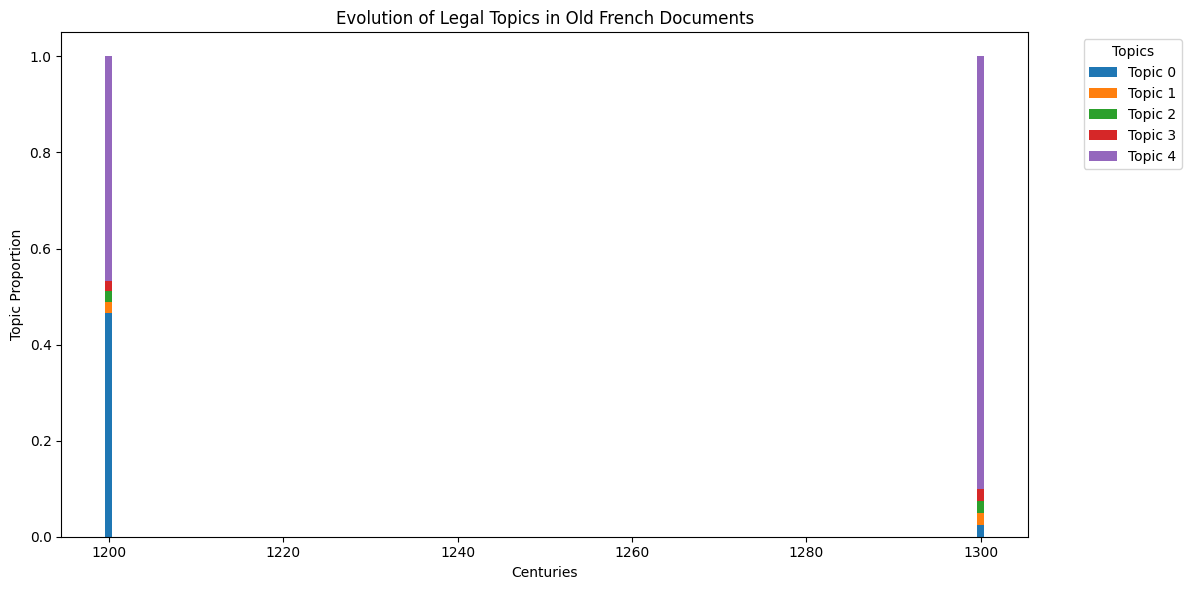

Top words for each topic:
Topic: 0 
Words: 0.098*"..." + 0.098*"faisons" + 0.098*"savoir" + 0.098*"roy" + 0.098*"france" + 0.098*"grâce" + 0.098*"nous" + 0.098*"dieu" + 0.016*"être" + 0.016*"propre"

Topic: 1 
Words: 0.048*"..." + 0.048*"nul" + 0.048*"cause" + 0.048*"être" + 0.048*"propre" + 0.048*"dieu" + 0.048*"juge" + 0.048*"pourra" + 0.048*"grâce" + 0.048*"nous"

Topic: 2 
Words: 0.048*"..." + 0.048*"pourra" + 0.048*"garder" + 0.048*"propre" + 0.048*"être" + 0.048*"cause" + 0.048*"justice" + 0.048*"juge" + 0.048*"rois" + 0.048*"grâce"

Topic: 3 
Words: 0.048*"..." + 0.048*"pourra" + 0.048*"cause" + 0.048*"dieu" + 0.048*"propre" + 0.048*"nous" + 0.048*"nul" + 0.048*"justice" + 0.048*"juge" + 0.048*"roy"

Topic: 4 
Words: 0.114*"..." + 0.063*"royaume" + 0.063*"maintenir" + 0.062*"son" + 0.062*"doit" + 0.062*"garder" + 0.062*"rois" + 0.062*"justice" + 0.062*"juge" + 0.062*"nul"

Topic Coherence: 0.28340593156541355


In [1]:
import nltk
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
import string
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Download necessary NLTK data
nltk.download('punkt')

# Sample Old French legal documents with dates (replace with your actual corpus)
documents = [
    ("Li rois doit garder et maintenir justice en son royaume...", 1200),
    ("Nous, par la grâce de Dieu, roy de France, savoir faisons...", 1250),
    ("Item, nul ne pourra être juge en sa propre cause...", 1300),
    # Add more documents with their approximate dates or search similar in the internet CEMA (cema.lamop.fr) is your friend :-)
]

# Custom stopwords for Old French legal documents
custom_stopwords = set(['le', 'la', 'les', 'de', 'du', 'des', 'et', 'en', 'que', 'qui', 'pour', 'par', 'item'])

# Legal terms to keep (domain-specific vocabulary)
legal_terms = set(['roi', 'justice', 'loi', 'cour', 'juge', 'droit', 'peine', 'amende', 'ordonnance'])

# Preprocessing function
def preprocess(text):
    # Convert to lowercase and tokenize
    tokens = word_tokenize(text.lower())

    # Remove punctuation and numbers
    tokens = [token for token in tokens if token not in string.punctuation and not token.isdigit()]

    # Remove stopwords, but keep legal terms
    tokens = [token for token in tokens if token not in custom_stopwords or token in legal_terms]

    # Remove short tokens (likely to be abbreviations or OCR errors)
    tokens = [token for token in tokens if len(token) > 2]

    return tokens

# Preprocess all documents and group by century
texts_by_century = defaultdict(list)
for text, year in documents:
    processed_text = preprocess(text)
    century = "CALCULATE THE CENTURY FROM THE YEAR"
    texts_by_century[century].append(processed_text)

# Create dictionary and corpus
all_texts = [text for century_texts in texts_by_century.values() for text in century_texts]
dictionary = corpora.Dictionary(all_texts)
corpus = [dictionary.doc2bow(text) for text in all_texts]

# Train LDA model
num_topics = 5  # You can adjust this
lda_model = "TRAIN AN LDA MODEL"

# Function to get average topic distribution for a century
def get_avg_topic_dist(texts):
    century_corpus = [dictionary.doc2bow(text) for text in texts]
    topic_dists = [dict(lda_model.get_document_topics(doc)) for doc in century_corpus]
    avg_dist = {i: np.mean([dist.get(i, 0) for dist in topic_dists]) for i in range(num_topics)}
    return avg_dist

# Get average topic distributions for each century
century_distributions = {century: get_avg_topic_dist(texts) for century, texts in texts_by_century.items()}

# Prepare data for visualization
topics = range(num_topics)
centuries = sorted(century_distributions.keys())
topic_scores = [[century_distributions[century][topic] for century in centuries] for topic in topics]

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bottom = np.zeros(len(centuries))

for topic, scores in enumerate(topic_scores):
    ax.bar(centuries, scores, bottom=bottom, label=f'Topic {topic}')
    bottom += scores

ax.set_xlabel('Centuries')
ax.set_ylabel('Topic Proportion')
ax.set_title('Evolution of Legal Topics in Old French Documents')
ax.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
"HOW DO WE SHOW THE VISUALIZATION?"

# Print top words for each topic
print("Top words for each topic:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Calculate topic coherence
coherence_model = gensim.models.CoherenceModel(model=lda_model, texts=all_texts, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()
print(f"Topic Coherence: {coherence}")

## Solution

1. century = (year // 100) * 100

2. lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)

3. plt.show()